In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy import stats

In [2]:
# import data

dataFemales = pd.read_csv('MA_Exer_PikesPeak_Females.txt',delimiter='\t',encoding='latin-1')
dataMales = pd.read_csv('MA_Exer_PikesPeak_Males.txt',delimiter='\t',encoding='latin-1')

In [3]:
# parse race times and convert to float

time = re.compile(r'[A-Z]?\s*(1)?:?([0-5][0-9]):([0-5][0-9])')

def toMinutes(timeList):
    hours = []
    minutes = []
    seconds = []
    # separate race time string into hours, minutes, and seconds string lists
    for i in list(timeList):
        m = time.match(i)
        hours.append(m.group(1))
        minutes.append(m.group(2))
        seconds.append(m.group(3))
    # convert string lists into floats
    minutes = [float(i) for i in minutes]
    seconds = [float(i) for i in seconds]
    hours = [float(i or 0) for i in hours]
    timeFloat = []
    # convert hours, minutes, seconds to only minutes float
    for i in range(0,len(minutes)):
        totalTime = (60*hours[i] + minutes[i] + seconds[i]/60)
        timeFloat.append(totalTime)
    return np.array(timeFloat)

In [4]:
# convert minutes back to a time string

def toRaceString(minutesFloat):
    if minutesFloat >= 60:
        h = str(int(minutesFloat//60))
        m = format(int(minutesFloat-60*int(h)),'02')
        s = format(int((minutesFloat - int(minutesFloat))*60),'02')
        return(h+':'+m+':'+s)
    else:
        m = format(int(minutesFloat),'02')
        s = format(int((minutesFloat - int(minutesFloat))*60),'02')
        return(m+':'+s)

In [5]:
# make a dataframe of mean, median, mode, and range by gender

def raceStats(female,male):
    raceStats = pd.DataFrame([])
    raceStats['Gender'] = ['Female','Male']
    raceStats['N'] = [len(female),len(male)]
    raceStats['Mean'] = [toRaceString(np.mean(female)),toRaceString(np.mean(male))]
    raceStats['Median'] = [toRaceString(np.median(female)),toRaceString(np.median(male))]
    raceStats['Mode'] = [toRaceString(stats.mode(female)[0][0]),toRaceString(stats.mode(male)[0][0])]
    raceStats['Range'] = [toRaceString(np.max(female)-np.min(female)),toRaceString(np.max(male)-np.min(male))]
    return raceStats

In [6]:
# convert time lists to arrays

femaleNetTimes = toMinutes(dataFemales['Net Tim'])
maleNetTimes = toMinutes(dataMales['Net Tim'])

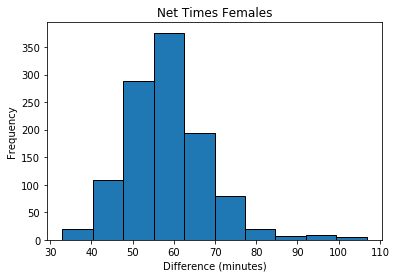

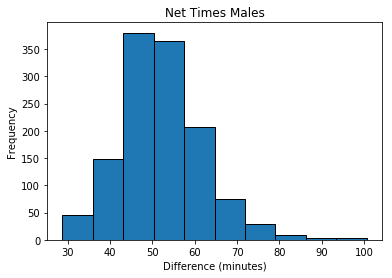

In [7]:
# plot histograms of net times in minutes by gender

plt.hist(femaleNetTimes,edgecolor='black')
plt.title('Net Times Females')
plt.xlabel('Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.hist(maleNetTimes,edgecolor='black')
plt.title('Net Times Males')
plt.xlabel('Difference (minutes)')
plt.ylabel('Frequency')
plt.show()

In [8]:
raceStats(femaleNetTimes,maleNetTimes)

,Gender,N,Mean,Median,Mode,Range
0,Female,1105,58:28,57:51,48:06,1:13:50
1,Male,1265,52:07,51:22,35:28,1:11:51
